# PART 2 Clean and Transform data
This process have 3 steps
1. clean and transform data from source lazada.
2. clean and transform data from source shopee.
3. merge both of them.

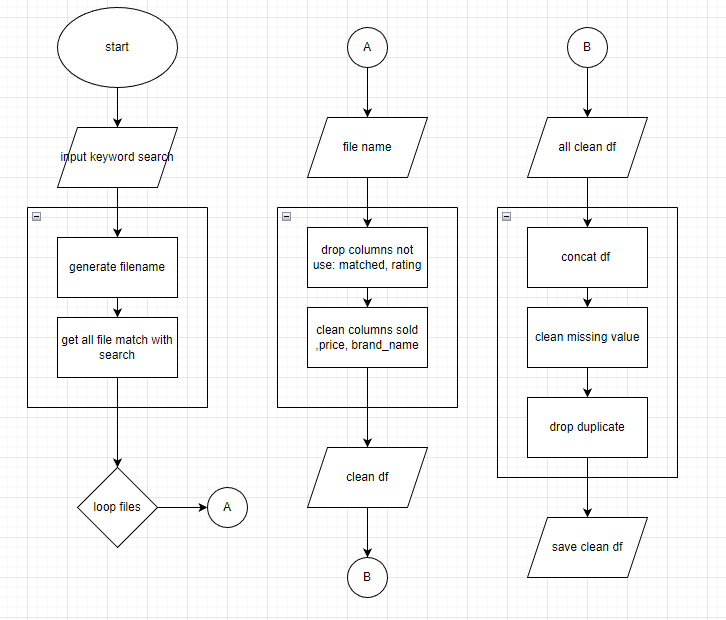

In [2]:
# global variable search_term that we can changed to get data.
search_term = 'keychron k4'

In [3]:
import pandas as pd
from pathlib import Path
from dependencies import preprocessing

TEMP_DATA = '../tmp_data/'
LAZADA_PLATFORM = 'lazada'
SHOPEE_PLATFORM = 'shopee'

get file from tmp_data by {search_term}

In [4]:
# import file name start with product name
prefix_filename = search_term.replace(' ','_')
fileNames = [file.name for file in Path(TEMP_DATA).iterdir() if file.name.startswith(prefix_filename)] 
print(fileNames)

['keychron_k4_lazada.csv', 'keychron_k4_shopee.csv']


____
## 2.1 clean and transform data from source lazada
- drop column that no need and have high rate missing value e.g., matched and rating
- little clean in columns price and sold

In [5]:
df1 = pd.read_csv(f'{TEMP_DATA}/{fileNames[0]}')
df1.head()

,alink,product_name,price,sold,matched,store_name,brand_name,specification,rating,platform
0,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 Wireless Keyboard Thai (คีย์บอร์ดไ...,"฿4,390.00",792 ชิ้น,True,Keychron,Keychron,Dark Gray,NaN,lazada
1,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 hotswap (Key ENG) Mechanical Keybo...,"฿3,799.00",NaN,True,BIGPENGUIN,No Brand,Aluminium -Dark Grey,NaN,lazada
2,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 G V2บลูทูธไร้สายคีย์บอร์ดแบบกลไก W...,"฿3,599.00",NaN,True,Keychron dealer,Keychron,Blue,NaN,lazada
3,https://www.lazada.co.th/products/in-stock-key...,[ประกันไทย] [in stock] Keychron K4 V2 คีย์บอร์...,"฿3,150.00",67 ชิ้น,True,gMPrbXQX,No Brand,Red switch-K4 RGB,NaN,lazada
4,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 V2 เอฟเฟกต์แสงหลายโหมดแบบคู่ คีย์...,"฿3,150.00",139 ชิ้น,True,cc Key Shop,No Brand,Brown switch-K4 LED,NaN,lazada


In [6]:
df1.drop(['matched'], axis=1, inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   alink          77 non-null     object 
 1   product_name   77 non-null     object 
 2   price          77 non-null     object 
 3   sold           7 non-null      object 
 4   store_name     77 non-null     object 
 5   brand_name     77 non-null     object 
 6   specification  74 non-null     object 
 7   rating         0 non-null      float64
 8   platform       77 non-null     object 
dtypes: float64(1), object(8)
memory usage: 5.5+ KB


In [8]:
df1_clean = df1.copy()
df1_clean['price'] = df1_clean['price'].apply(preprocessing.clean_price_laz)
df1_clean['sold'] = df1_clean['sold'].apply(preprocessing.clean_sold_laz)

df1_clean

,alink,product_name,price,sold,store_name,brand_name,specification,rating,platform
0,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 Wireless Keyboard Thai (คีย์บอร์ดไ...,4390.0,792.0,Keychron,Keychron,Dark Gray,NaN,lazada
1,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 hotswap (Key ENG) Mechanical Keybo...,3799.0,NaN,BIGPENGUIN,No Brand,Aluminium -Dark Grey,NaN,lazada
2,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 G V2บลูทูธไร้สายคีย์บอร์ดแบบกลไก W...,3599.0,NaN,Keychron dealer,Keychron,Blue,NaN,lazada
3,https://www.lazada.co.th/products/in-stock-key...,[ประกันไทย] [in stock] Keychron K4 V2 คีย์บอร์...,3150.0,67.0,gMPrbXQX,No Brand,Red switch-K4 RGB,NaN,lazada
4,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 V2 เอฟเฟกต์แสงหลายโหมดแบบคู่ คีย์...,3150.0,139.0,cc Key Shop,No Brand,Brown switch-K4 LED,NaN,lazada
...,...,...,...,...,...,...,...,...,...
72,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 J V2บลูทูธไร้สายคีย์บอร์ด RGB Back...,8461.0,NaN,xcr288,No Brand,Blue Switches,NaN,lazada
73,https://www.lazada.co.th/products/keychron-v2-...,Keychron V2 K4 G คีย์บอร์ดแบบกลไกไร้สายบลูทูธไ...,5128.0,NaN,sf8sfjergdr,No Brand,Blue Switches,NaN,lazada
74,https://www.lazada.co.th/products/keychron-v2-...,Keychron V2 K4 G คีย์บอร์ดแบบกลไกไร้สายบลูทูธไ...,5345.0,NaN,ivnqbo,No Brand,Brown Switches,NaN,lazada
75,https://www.lazada.co.th/products/keychron-key...,【แป้นพิมพ์】 Keychron keyboard wooden hand rest...,909.0,NaN,qi sheng trade,No Brand,K3,NaN,lazada


___
## 2.2 clean and transform data from source shopee
- drop column that no need and have high rate missing value e.g., matched and rating
- little clean in columns price and sold

In [9]:
df2 = pd.read_csv(f'{TEMP_DATA}/{fileNames[1]}')
df2.drop(['matched'], axis=1, inplace=True)
df2['price'] = df2['price'].astype(float)

df2.head()

,product_name,price,alink,store_name,brand_name,price_range,rating,sold,platform
0,Keychron K4 V.2 Hotswappable (Key ENG) ⌨ ขนาด ...,4190.0,https://shopee.co.th/Keychron-K4-V.2-Hotswappa...,hardware_riser,Keychron(คีย์ครอน),"฿4,190",5,112,shopee
1,Keychron K4V2 คีย์ครอน K4 คีย์บอร์ดไร้สาย Wire...,4190.0,https://shopee.co.th/Keychron-K4V2-คีย์ครอน-K4...,mechanicpro_official,Keychron(คีย์ครอน),"฿4,190 - ฿4,390",5,64,shopee
2,Keychron ที่พักข้อมือไม้วอลนัท สําหรับ K2 K4 K...,569.0,https://shopee.co.th/Keychron-ที่พักข้อมือไม้ว...,kongjianzhan.th,Keychron(คีย์ครอน),฿569,4.8,1.9พัน,shopee
3,Keychron K4 V.2 Hotswappable (Key ENG) ⌨ ขนาด ...,1729.0,https://shopee.co.th/Keychron-K4-V.2-Hotswappa...,h_skwf_p7j,None,"฿1,729",None,0,shopee
4,[ประกันไทย] [in stock] Keychron K4 V2 คีย์บอร์...,1364.0,https://shopee.co.th/-ประกันไทย-in-stock-Keych...,h_skwf_p7j,None,"฿1,364 - ฿3,006",None,0,shopee


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   price         100 non-null    float64
 2   alink         100 non-null    object 
 3   store_name    100 non-null    object 
 4   brand_name    100 non-null    object 
 5   price_range   100 non-null    object 
 6   rating        100 non-null    object 
 7   sold          100 non-null    object 
 8   platform      100 non-null    object 
dtypes: float64(1), object(8)
memory usage: 7.2+ KB


In [11]:
# df2['sold'].unique()
df2['brand_name'].unique()

array(['Keychron(คีย์ครอน)', 'None'], dtype=object)

In [12]:
df2_clean = df2.copy()
df2_clean['sold'] = df2_clean['sold'].apply(preprocessing.clean_sold_shp)
df2_clean['brand_name'] = df2_clean['brand_name'].apply(preprocessing.clean_brandname)

In [13]:
df2_clean

,product_name,price,alink,store_name,brand_name,price_range,rating,sold,platform
0,Keychron K4 V.2 Hotswappable (Key ENG) ⌨ ขนาด ...,4190.0,https://shopee.co.th/Keychron-K4-V.2-Hotswappa...,hardware_riser,Keychron,"฿4,190",5,112.0,shopee
1,Keychron K4V2 คีย์ครอน K4 คีย์บอร์ดไร้สาย Wire...,4190.0,https://shopee.co.th/Keychron-K4V2-คีย์ครอน-K4...,mechanicpro_official,Keychron,"฿4,190 - ฿4,390",5,64.0,shopee
2,Keychron ที่พักข้อมือไม้วอลนัท สําหรับ K2 K4 K...,569.0,https://shopee.co.th/Keychron-ที่พักข้อมือไม้ว...,kongjianzhan.th,Keychron,฿569,4.8,1900.0,shopee
3,Keychron K4 V.2 Hotswappable (Key ENG) ⌨ ขนาด ...,1729.0,https://shopee.co.th/Keychron-K4-V.2-Hotswappa...,h_skwf_p7j,None,"฿1,729",None,0.0,shopee
4,[ประกันไทย] [in stock] Keychron K4 V2 คีย์บอร์...,1364.0,https://shopee.co.th/-ประกันไทย-in-stock-Keych...,h_skwf_p7j,None,"฿1,364 - ฿3,006",None,0.0,shopee
...,...,...,...,...,...,...,...,...,...
95,☼✶Keychron K4V2 คีย์ครอน K4 คีย์บอร์ดไร้สาย Wi...,1555.0,https://shopee.co.th/☼✶Keychron-K4V2-คีย์ครอน-...,05nq8bnw5t,None,None,None,NaN,shopee
96,❣✘[ประกันไทย] [in stock] Keychron K4 V2 คีย์บอ...,1352.0,https://shopee.co.th/❣✘-ประกันไทย-in-stock-Key...,zd4rykw42u,None,None,None,NaN,shopee
97,❣Keychron K4 V2 คีย์บอร์ด Mechanical ไร้สาย K...,1252.0,https://shopee.co.th/❣Keychron-K4-V2-คีย์บอร์ด...,7mrctnc76n,None,None,None,NaN,shopee
98,Keychron Wooden Palm rest ของแท้ 100% ที่รองข้...,669.0,https://shopee.co.th/Keychron-Wooden-Palm-rest...,0812345142shop,None,฿669 - ฿699,None,NaN,shopee


____
## 2.3 Concat clean df and Save to tmp



In [14]:
vertical_concat = pd.concat([df1_clean, df2_clean], axis=0)
vertical_concat

,alink,product_name,price,sold,store_name,brand_name,specification,rating,platform,price_range
0,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 Wireless Keyboard Thai (คีย์บอร์ดไ...,4390.0,792.0,Keychron,Keychron,Dark Gray,NaN,lazada,NaN
1,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 hotswap (Key ENG) Mechanical Keybo...,3799.0,NaN,BIGPENGUIN,No Brand,Aluminium -Dark Grey,NaN,lazada,NaN
2,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 G V2บลูทูธไร้สายคีย์บอร์ดแบบกลไก W...,3599.0,NaN,Keychron dealer,Keychron,Blue,NaN,lazada,NaN
3,https://www.lazada.co.th/products/in-stock-key...,[ประกันไทย] [in stock] Keychron K4 V2 คีย์บอร์...,3150.0,67.0,gMPrbXQX,No Brand,Red switch-K4 RGB,NaN,lazada,NaN
4,https://www.lazada.co.th/products/keychron-k4-...,Keychron K4 V2 เอฟเฟกต์แสงหลายโหมดแบบคู่ คีย์...,3150.0,139.0,cc Key Shop,No Brand,Brown switch-K4 LED,NaN,lazada,NaN
...,...,...,...,...,...,...,...,...,...,...
95,https://shopee.co.th/☼✶Keychron-K4V2-คีย์ครอน-...,☼✶Keychron K4V2 คีย์ครอน K4 คีย์บอร์ดไร้สาย Wi...,1555.0,NaN,05nq8bnw5t,None,NaN,None,shopee,None
96,https://shopee.co.th/❣✘-ประกันไทย-in-stock-Key...,❣✘[ประกันไทย] [in stock] Keychron K4 V2 คีย์บอ...,1352.0,NaN,zd4rykw42u,None,NaN,None,shopee,None
97,https://shopee.co.th/❣Keychron-K4-V2-คีย์บอร์ด...,❣Keychron K4 V2 คีย์บอร์ด Mechanical ไร้สาย K...,1252.0,NaN,7mrctnc76n,None,NaN,None,shopee,None
98,https://shopee.co.th/Keychron-Wooden-Palm-rest...,Keychron Wooden Palm rest ของแท้ 100% ที่รองข้...,669.0,NaN,0812345142shop,None,NaN,None,shopee,฿669 - ฿699


In [15]:
vertical_concat.duplicated(subset=['product_name','store_name','platform','price','specification']).sum()

0

In [16]:
vertical_concat.drop_duplicates(subset=['product_name','store_name','platform'], inplace=True)

In [17]:
vertical_concat.columns

Index(['alink', 'product_name', 'price', 'sold', 'store_name', 'brand_name',
       'specification', 'rating', 'platform', 'price_range'],
      dtype='object')

In [18]:
# save just columns we need
vertical_concat = vertical_concat[[ 'product_name', 'price', 'sold', 'store_name', 'brand_name',
       'specification',  'platform','alink']]

In [19]:
vertical_concat.sort_values(by='price')

,product_name,price,sold,store_name,brand_name,specification,platform,alink
57,d - s แผ่นรองข้อมือสําหรับคีย์บอร์ด/Keychron k...,194.0,NaN,discountstore.th,None,NaN,shopee,https://shopee.co.th/d-s-แผ่นรองข้อมือสําหรับค...
66,Keychron k4 k4 k6 k8ใช้เฉพาะกับโรเจอร์สอิจิอิจ...,250.0,NaN,TAO Keyboard&Mouse,No Brand,K4กับขนาด (เบาะรอง PORON),lazada,https://www.lazada.co.th/products/keychron-k4-...
75,Foam Plate (Mute Foam) for Keychron K2 K4 K6 K...,275.0,NaN,lmkeyboard,None,NaN,shopee,https://shopee.co.th/Foam-Plate-(Mute-Foam)-fo...
22,h0v d - s แผ่นรองข้อมือสําหรับคีย์บอร์ด/Keychr...,341.0,0.0,mzrxch7h0v,None,NaN,shopee,https://shopee.co.th/h0v-d-s-แผ่นรองข้อมือสําห...
64,♣Foam Plate (Mute Foam) for Keychron K2 K4 K6 ...,437.0,NaN,Yer2516,No Brand,Keydous NJ80,lazada,https://www.lazada.co.th/products/foam-plate-m...
...,...,...,...,...,...,...,...,...
30,Keychron K4 J V2บลูทูธไร้สายคีย์บอร์ด RGB Back...,8724.0,NaN,lnt082,No Brand,Red Switches,lazada,https://www.lazada.co.th/products/keychron-k4-...
7,Keychron K4 J V2บลูทูธไร้สายคีย์บอร์ด RGB Back...,8821.0,NaN,lan.g,No Brand,Brown Switches,lazada,https://www.lazada.co.th/products/keychron-k4-...
38,Keychron K4 J V2บลูทูธไร้สายแบ็คไลท์ RGB คีย์บ...,8838.0,NaN,yuanshiheyidianzishangwu,No Brand,Brown Switches,lazada,https://www.lazada.co.th/products/keychron-k4-...
58,Keychron V2 K4 G คีย์บอร์ดแบบกลไกไร้สายบลูทูธไ...,10139.0,NaN,อุปกรณ์ดิจิตอล Stellar 3C,No Brand,Red Switches,lazada,https://www.lazada.co.th/products/keychron-v2-...


In [20]:
vertical_concat['store_name'] = vertical_concat['store_name'].apply(preprocessing.null_value) 
vertical_concat['sold'] = vertical_concat['sold'].apply(preprocessing.null_value) 
vertical_concat['brand_name'] = vertical_concat['brand_name'].apply(preprocessing.null_value) 
vertical_concat['specification'] = vertical_concat['specification'].apply(preprocessing.null_value)
vertical_concat['search'] = search_term
vertical_concat = vertical_concat[[ 'product_name', 'price', 'sold', 'store_name', 'brand_name',
        'specification',  'platform','alink','search']] 

<ipython-input-20-fd35beed632e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertical_concat['store_name'] = vertical_concat['store_name'].apply(preprocessing.null_value)
<ipython-input-20-fd35beed632e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertical_concat['sold'] = vertical_concat['sold'].apply(preprocessing.null_value)
<ipython-input-20-fd35beed632e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [21]:
vertical_concat.isna().sum()

product_name       0
price              0
sold             107
store_name         0
brand_name        90
specification    103
platform           0
alink              0
search             0
dtype: int64

In [22]:
vertical_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   176 non-null    object 
 1   price          176 non-null    float64
 2   sold           69 non-null     float64
 3   store_name     176 non-null    object 
 4   brand_name     86 non-null     object 
 5   specification  73 non-null     object 
 6   platform       176 non-null    object 
 7   alink          176 non-null    object 
 8   search         176 non-null    object 
dtypes: float64(2), object(7)
memory usage: 13.8+ KB


In [23]:
# save file to tmp_data folder
vertical_concat.to_csv(f'{TEMP_DATA}prep_{prefix_filename}.csv', index=False, encoding='utf-8-sig')

____
## Data visaulization

In [26]:
vertical_concat.groupby(['platform']).describe()

price                                                            \
          count         mean          std    min     25%     50%      75%   
platform                                                                    
lazada     76.0  5299.815526  2538.832633  250.0  3749.0  5752.0  6974.75   
shopee    100.0  1547.500000   864.013123  194.0  1231.5  1457.0  1669.00   

                   sold                                                  \
              max count        mean         std  min   25%   50%    75%   
platform                                                                  
lazada    12243.0   7.0  196.714286  282.344774  7.0  32.0  67.0  223.5   
shopee     4390.0  62.0  107.806452  392.346486  0.0   0.0   0.0    0.0   

                  
             max  
platform          
lazada     792.0  
shopee    2000.0

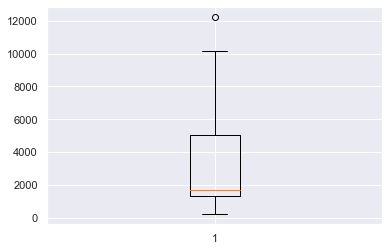

In [36]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  

# fig = plt.figure(figsize =(10, 7))
plt.boxplot(vertical_concat['price'])
plt.show()

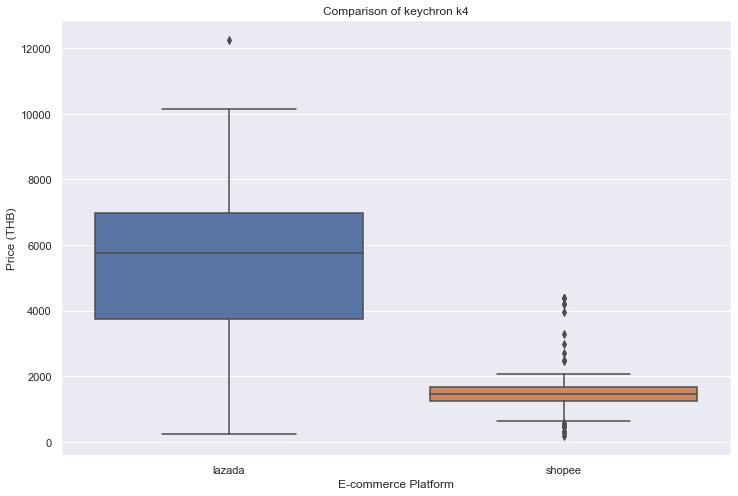

In [40]:
fig = plt.figure(figsize =(12, 8))
sns.set()
_ = sns.boxplot(x='platform', y='price', data=vertical_concat)
_ = plt.title(f'Comparison of {search_term}')
_ = plt.ylabel('Price (THB)')
_ = plt.xlabel('E-commerce Platform')
# Show the plot
plt.show()